<a href="https://colab.research.google.com/github/cabb1808/miniproyecto1/blob/main/MiniProyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción a la Clasificación - MiniProyecto 2

Un clasificador lo que realiza es a partir de una base de datos o de una observación ${\bf{x}}_n$ realiza una predicción de una etiqueta discreta $t_n$,

Para nosotros en el caso de la base de datos de sismos, tenemos $3$ tipos diferentes de clases

- 1 - Local
- 2 - Regional
- 3 - Telesismo

Ejemplo base de datos IRS

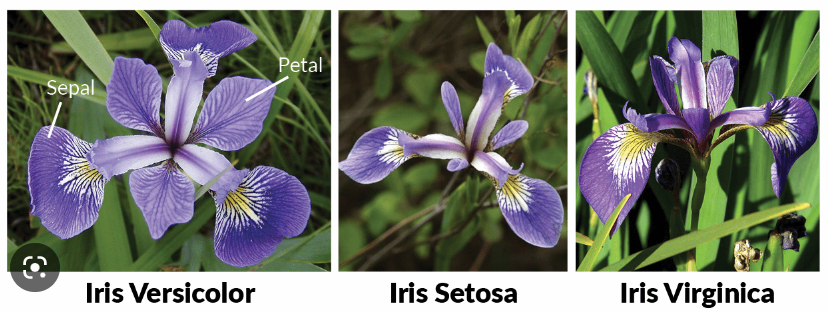

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
X, y = load_iris(return_X_y=True)
dB = load_iris()
print(dB['target'])
print('Tipos de Clase: ', dB.target_names)
print('Tipos de Características: ', dB.feature_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Tipos de Clase:  ['setosa' 'versicolor' 'virginica']
Tipos de Características:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
import pandas as pd

Existen $50$ observaciones por cada clase

In [ ]:
dfIRIS = pd.DataFrame(X,columns = dB.feature_names)
dfIRIS['clase'] = y
dfIRIS

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


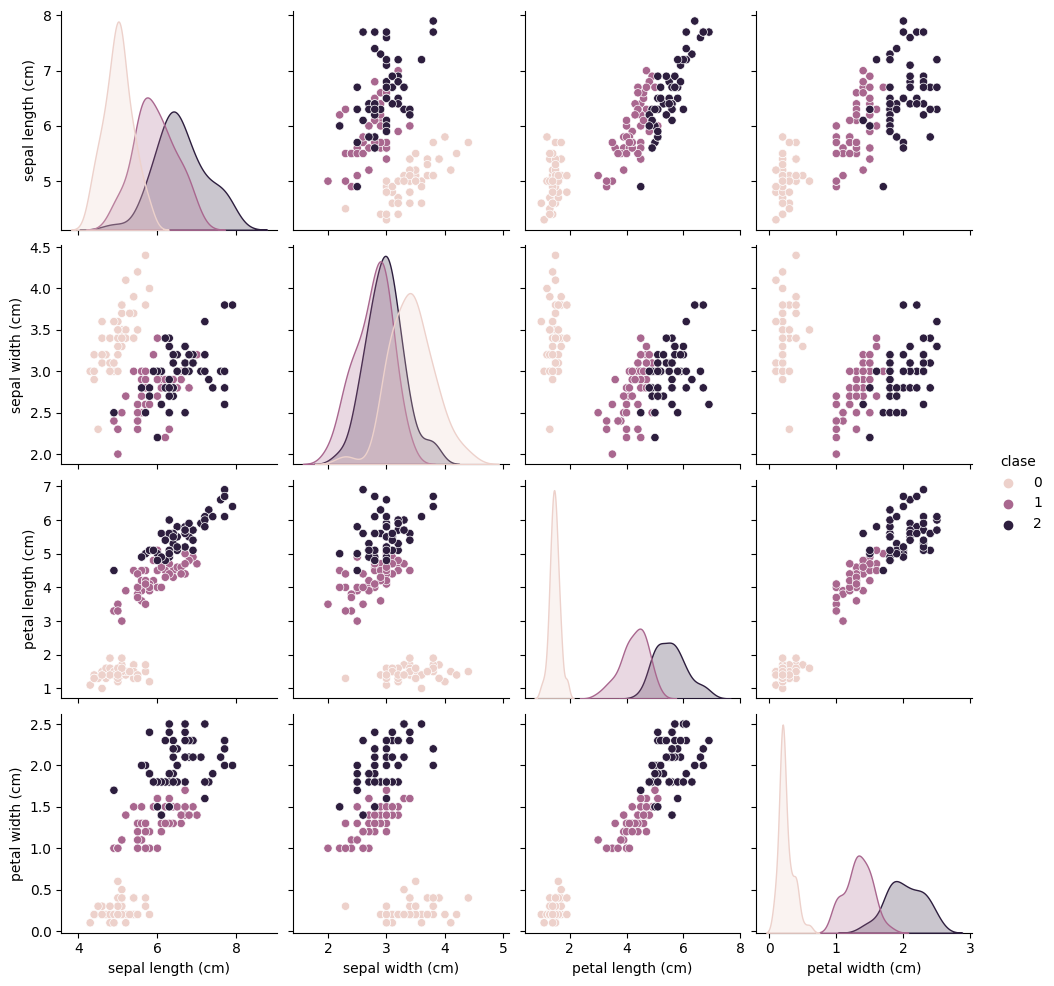

In [ ]:
import seaborn as sns

sns.pairplot(dfIRIS, hue="clase")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:
# Entrenar el clasificador Bayesiano
clfNB = GaussianNB()
clfNB.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamient

# Entrenar el clasificador de Regresión Logística
clfLR = LogisticRegression(random_state=0)
clfLR.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamient

LogisticRegression(random_state=0)

In [ ]:
aux = X[0,:]

In [ ]:
aux2 = np.reshape(X[0,:],(1,4))

In [ ]:
# Luego realizamos predicciones de los modelos
yPred = clfNB.predict(np.reshape(X[-1,:],(1,4))) # probamos la última flor
print('Prediccion clase con modelo Bayesiano: ',yPred)

yPred = clfLR.predict(np.reshape(X[-1,:],(1,4))) # probamos la última flor
print('Prediccion clase con modelo RegresionLogistica: ',yPred)

Prediccion clase con modelo Bayesiano:  [2]
Prediccion clase con modelo RegresionLogistica:  [2]


## Evaluacion del Desempeño

1. Accuracy score
2. Confussion Matrix

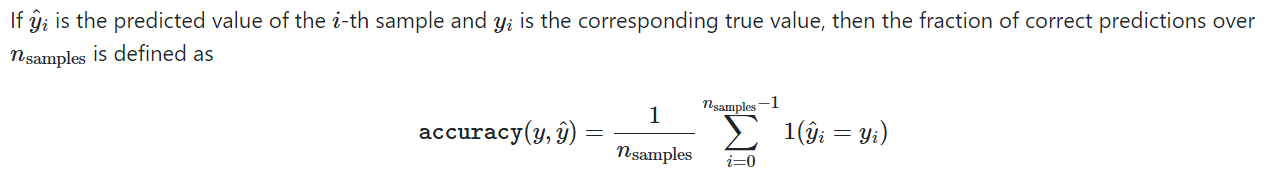

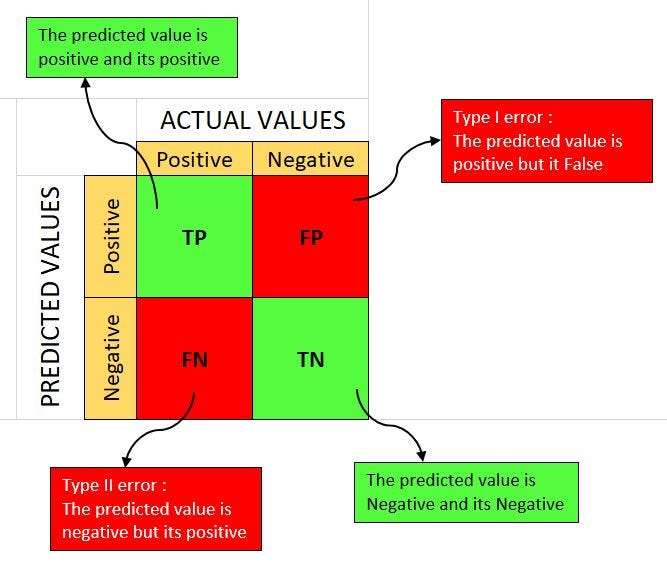

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

yPredTest_NB = clfNB.predict(X_test)
yPredTest_LR= clfLR.predict(X_test)

accTest_NB = accuracy_score(y_test,yPredTest_NB)
accTest_LR = accuracy_score(y_test,yPredTest_LR)

print('Acc para el modelo Bayesiano: ',accTest_NB)
print('Acc para el modelo de Regresión Logística: ',accTest_LR)

Acc para el modelo Bayesiano:  0.9333333333333333
Acc para el modelo de Regresión Logística:  0.9777777777777777


In [ ]:
print('Observeos las primeras 5 predicciones para ambos modelos: ')
print('True Labels: ',y_test[:10])
print('Pred NB: ',yPredTest_NB[:10])
print('Pred LR: ',yPredTest_LR[:10])

Observeos las primeras 5 predicciones para ambos modelos: 
True Labels:  [0 1 1 0 2 1 2 0 0 2]
Pred NB:  [0 1 1 0 2 2 2 0 0 2]
Pred LR:  [0 1 1 0 2 1 2 0 0 2]


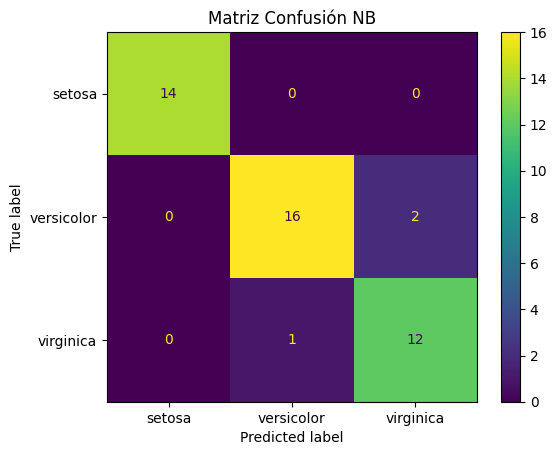

In [ ]:
import matplotlib.pyplot as plt
cmNB = confusion_matrix(y_test, yPredTest_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=dB.target_names)
disp.plot()
plt.title('Matriz Confusión NB')
plt.show()

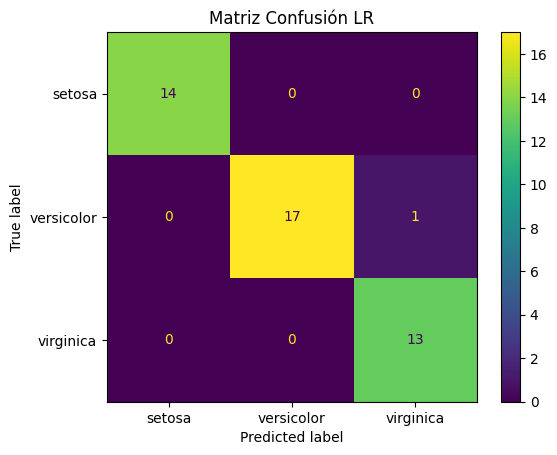

In [ ]:
import matplotlib.pyplot as plt
cmLR = confusion_matrix(y_test, yPredTest_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=dB.target_names)
disp.plot()
plt.title('Matriz Confusión LR')
plt.show()